# Ejercicio 3

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
import math
import numpy as np

### Modelo epidemiológico

In [2]:
def sir(t, s, i, r, alpha, beta, N):
    ds = - alpha * s * i / N
    di = alpha * s * i / N - beta * i
    dr = beta * i
    return ds, di, dr

In [3]:
def rk4_sir(f, t, h, y, alpha, beta, N):
  s, i, r = y
  k1s, k1i, k1r = [ h * x for x in f(t, s, i, r, alpha, beta, N) ]
  k2s, k2i, k2r = [ h * x for x in f(t + h / 2, s + k1s / 2, i + k1i / 2, r + k1r / 2, alpha, beta, N) ]
  k3s, k3i, k3r = [ h * x for x in f(t + h / 2, s + k2s / 2, i + k2i / 2, r + k2r / 2, alpha, beta, N) ]
  k4s, k4i, k4r = [ h * x for x in f(t + h, s + k3s, i + k3i, r + k3r, alpha, beta, N) ]
  s = s + (k1s + 2 * k2s + 2 * k3s + k4s) / 6
  i = i + (k1i + 2 * k2i + 2 * k3i + k4i) / 6
  r = r + (k1r + 2 * k2r + 2 * k3r + k4r) / 6
  return s, i, r

In [4]:
alpha = 0.27
beta = 0.043

N = 15000
i = 0.03 * N
s = N - i
r = 0
y = s, i, r
t_max = 150
t = np.linspace(0, t_max, t_max)
dt = 0.1

discretization = 10
ts = [ t / discretization  for t in range(0, t_max * discretization) ]
S = []
I = []
R = []

for t in ts:
  s, i, r = y
  S.append(s)
  I.append(i)
  R.append(r)
  y = rk4_sir(sir, t, dt, y, alpha, beta, N)

In [5]:
def myPlot(x, S, I, R, x0, x1, y0, y1, dis_x, dis_y, titulo, \
           drawS, drawI, drawR):
    # Tamaño del gráfico. Debería ser proporcional a 
    # los límites de cada coordenada.
    grafico, ax = plt.subplots(figsize = (12, 12));

    # Tamaño de los títulos de los ejes
    plt.xlabel("Tiempo", fontsize = 16);
    plt.ylabel("Cantidad de personas", fontsize = 16);

    # Título
    plt.title(titulo, fontsize = 25)

    # Tamaño de las letras de los ejes
    plt.tick_params(axis='both', which='major', labelsize = 10)
    plt.tick_params(axis='both', which='minor', labelsize = 10)

    # Discretización de los números que aparecen
    ax.xaxis.set_major_locator( MultipleLocator(dis_x) )
    ax.yaxis.set_major_locator( MultipleLocator(dis_y) )

    # Límites para cada coordenada
    plt.xlim([x0, x1]);
    plt.ylim([y0, y1]);

    # Tipo de gráfico y color 
    if (drawS):
      plt.plot(x, S, color = "orange", label='Susceptibles',)
    
    if (drawI):
      plt.plot(x, I, color = "red", label='Infectados')
    
    if (drawR):
      plt.plot(x, R, color = "green", label='Sanos',)
    
    plt.legend()
    ax.legend(fontsize="x-large")

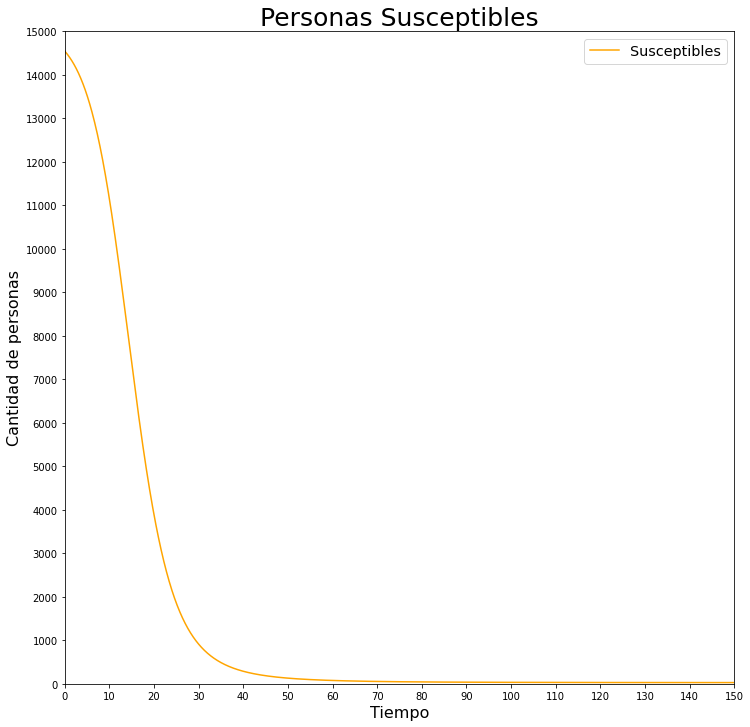

In [6]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Personas Susceptibles", True, False, False)

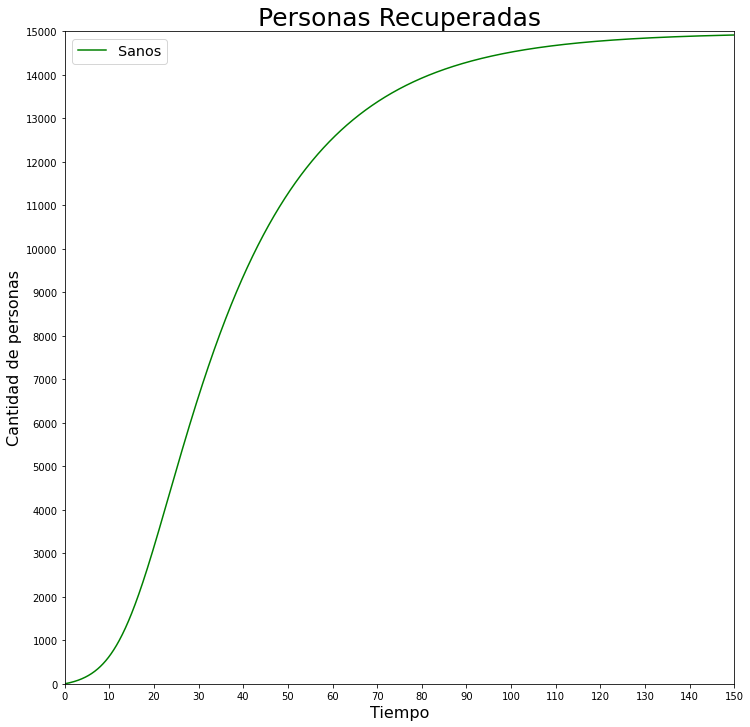

In [7]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Personas Recuperadas", False, False, True)

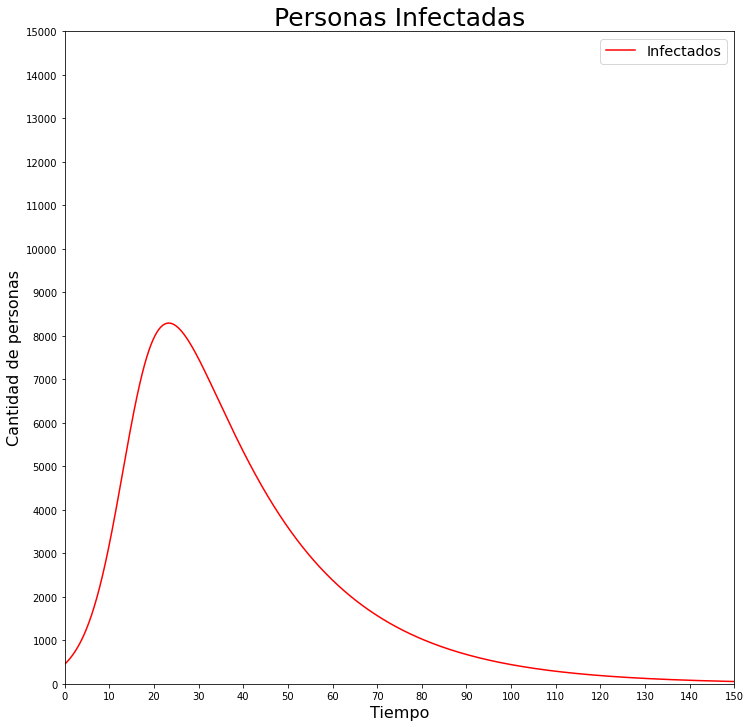

In [8]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Personas Infectadas", False, True, False)

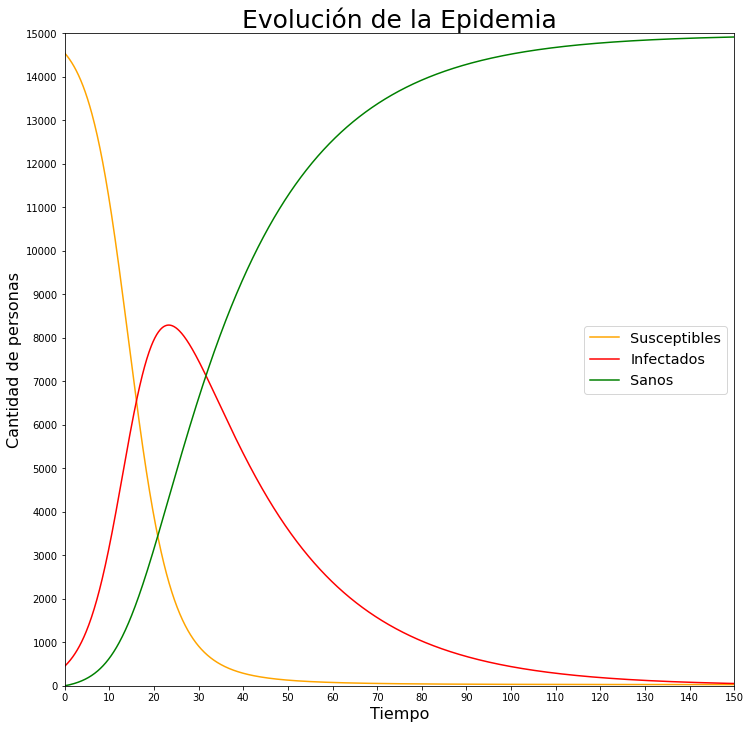

In [9]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Evolución de la Epidemia", True, True, True)

In [10]:
beta / alpha * N

2388.8888888888887

In [11]:
S.index(2392.386098486799) / discretization 

23.3

In [12]:
I[233]

8294.953367299471

### Consideración de la capacidad límite de atención


In [13]:
alpha = 0.12
beta = 0.043

i = 0.03 * N
s = N - i
r = 0
y = s, i, r
t_max = 200
t = np.linspace(0, t_max, t_max)
dt = 0.1

discretization = 10
ts = [ t / discretization  for t in range(0, t_max * discretization) ]
S = []
I = []
R = []

for t in ts:
  s, i, r = y
  S.append(s)
  I.append(i)
  R.append(r)
  y = rk4_sir(sir, t, dt, y, alpha, beta, N)

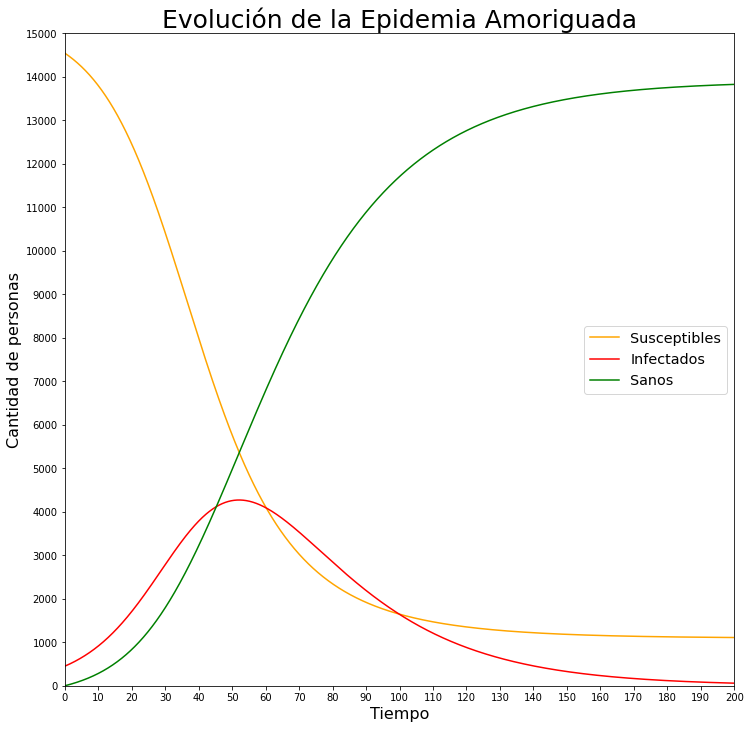

In [14]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Evolución de la Epidemia Amoriguada", True, True, True)

In [15]:
beta / alpha * N

5375.0

In [16]:
S.index(4800.338097755035) / discretization 

55.4

In [17]:
I[554] / N

0.2826199637366731

In [18]:
I[554]

4239.2994560500965

Modelo alternativo: duplicando la tasa de infección 

In [19]:
alpha = 0.54
beta = 0.043

i = 0.03 * N
s = N - i
r = 0
y = s, i, r
t_max = 150
t = np.linspace(0, t_max, t_max)
dt = 0.1

discretization = 10
ts = [ t / discretization  for t in range(0, t_max * discretization) ]
S = []
I = []
R = []

for t in ts:
  s, i, r = y
  S.append(s)
  I.append(i)
  R.append(r)
  y = rk4_sir(sir, t, dt, y, alpha, beta, N)

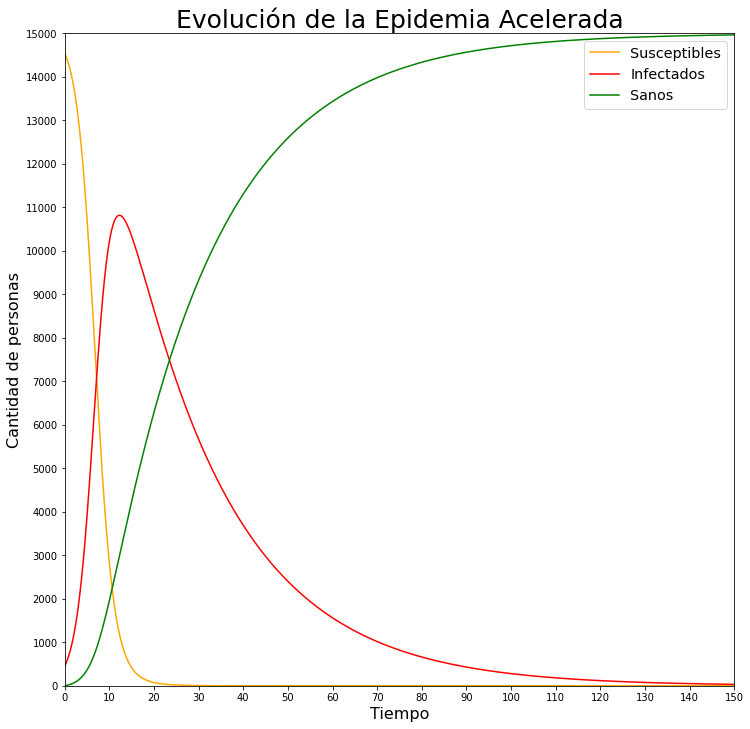

In [20]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Evolución de la Epidemia Acelerada", True, True, True)

In [21]:
beta / alpha * N

1194.4444444444443

In [22]:
S.index(4755.725722646705) / discretization 

8.5

In [23]:
I[85] / N

0.5939064467978297

### Modelo alternativo: enfermedad de rápida recuperación

In [24]:
alpha = 0.27
beta = 0.2

i = 0.03 * N
s = N - i
r = 0
y = s, i, r
t_max = 240
t = np.linspace(0, t_max, t_max)
dt = 0.1

discretization = 10
ts = [ t / discretization  for t in range(0, t_max * discretization) ]
S = []
I = []
R = []

for t in ts:
  s, i, r = y
  S.append(s)
  I.append(i)
  R.append(r)
  y = rk4_sir(sir, t, dt, y, alpha, beta, N)

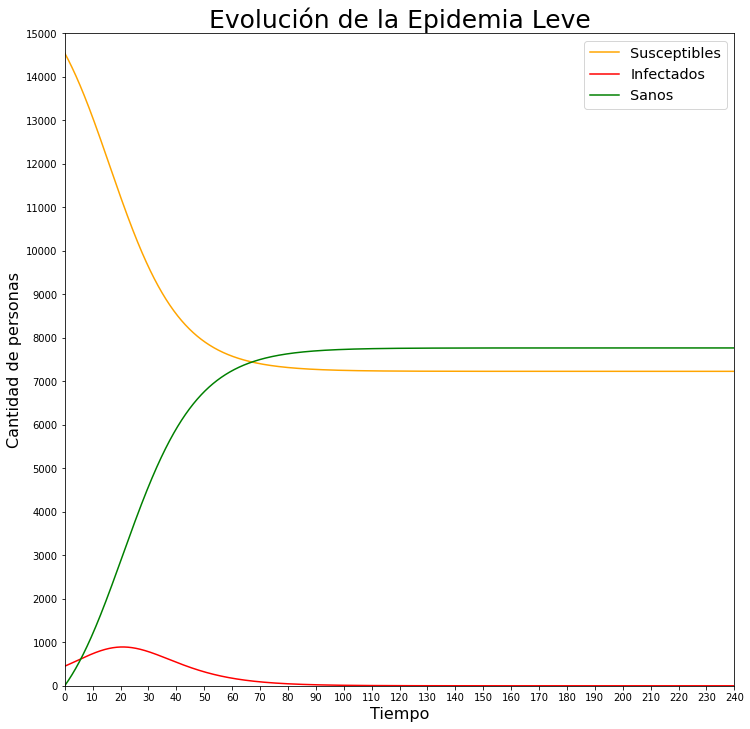

In [25]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Evolución de la Epidemia Leve", True, True, True)

### Modelo alternativo: alto porcentaje de infectados iniciales

In [26]:
alpha = 0.27
beta = 0.043

N = 15000
i = 0.30 * N
s = N - i
r = 0
y = s, i, r
t_max = 150
t = np.linspace(0, t_max, t_max)
dt = 0.1

discretization = 10
ts = [ t / discretization  for t in range(0, t_max * discretization) ]
S = []
I = []
R = []

for t in ts:
  s, i, r = y
  S.append(s)
  I.append(i)
  R.append(r)
  y = rk4_sir(sir, t, dt, y, alpha, beta, N)

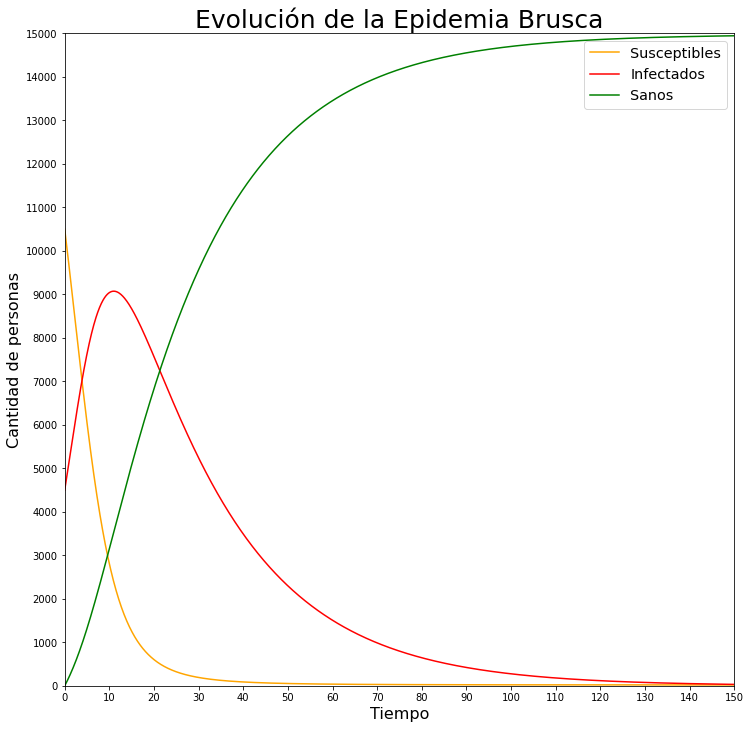

In [27]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Evolución de la Epidemia Brusca", True, True, True)